In [1]:
import numpy as np
import pandas as pd

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
path_data_train = 'D:\house-prices-advanced-regression-techniques\data/train.csv'
df = pd.read_csv(path_data_train)
df = df.set_index('Id')

Check NaN col and remove

In [40]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [17]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
df_num = df.select_dtypes(include='number')
df_cate = df.select_dtypes(exclude='number')
df_cate['SalePrice'] = df_num['SalePrice']

In [23]:
import seaborn as sns
%matplotlib inline

import matplotlib as mlp
from matplotlib import pyplot as plt

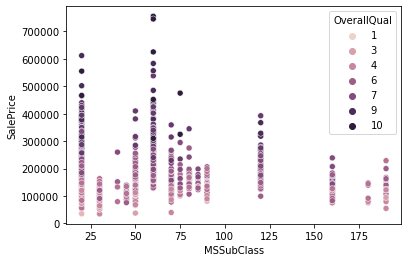

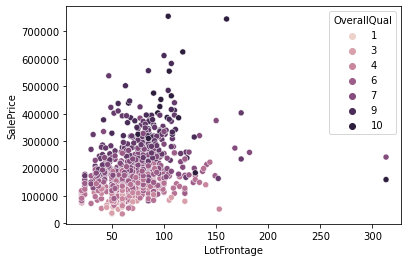

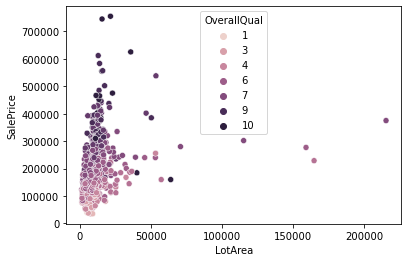

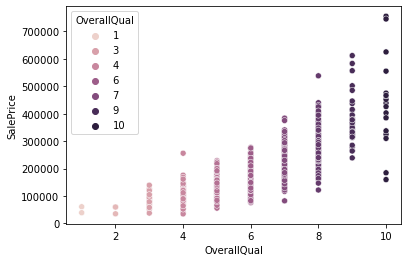

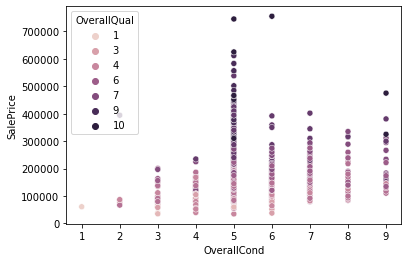

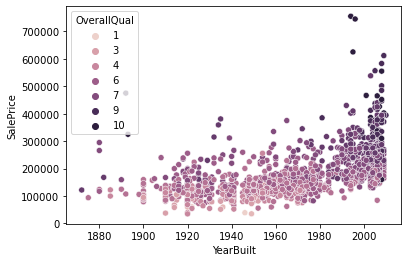

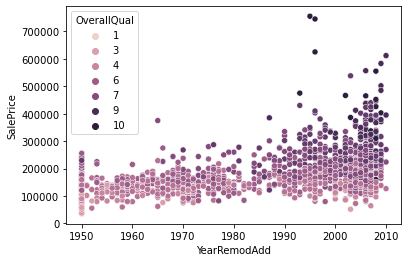

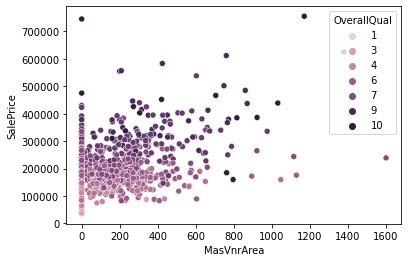

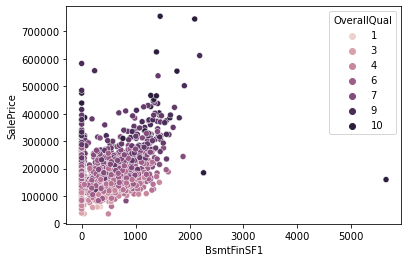

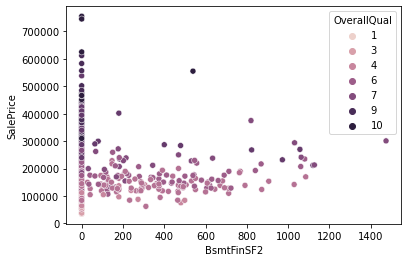

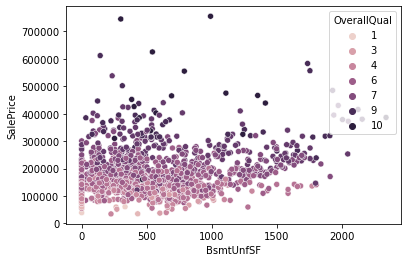

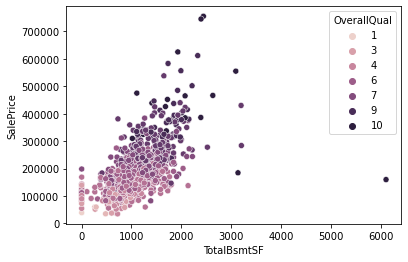

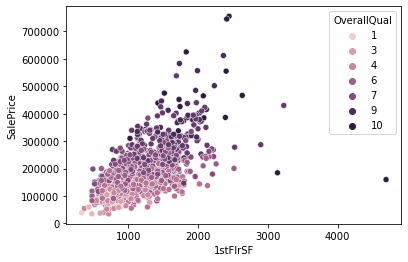

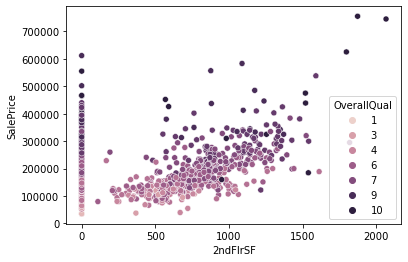

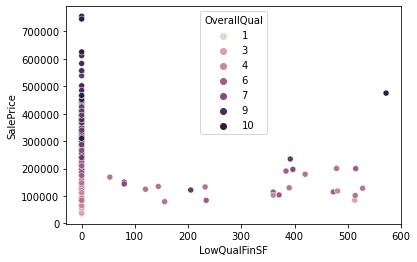

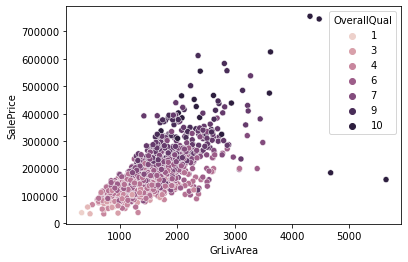

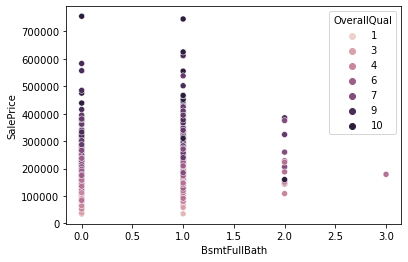

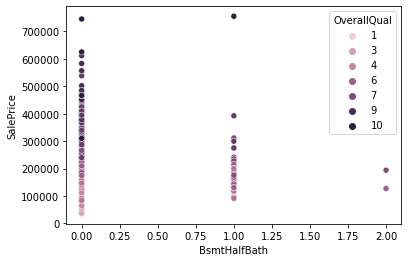

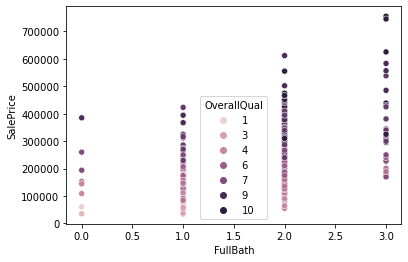

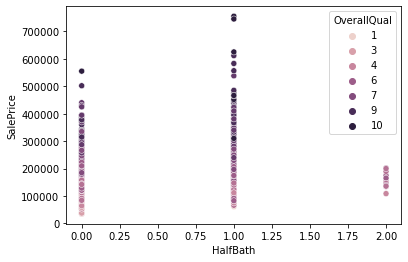

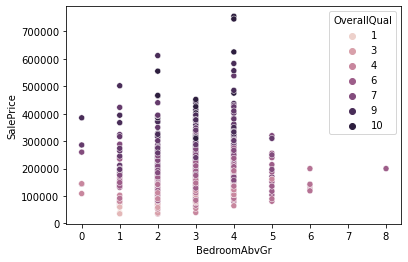

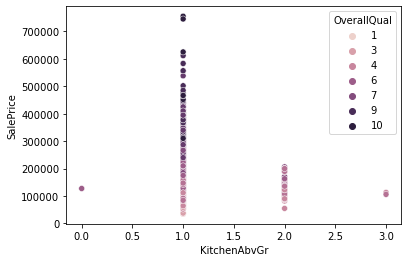

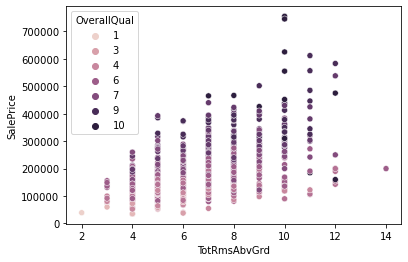

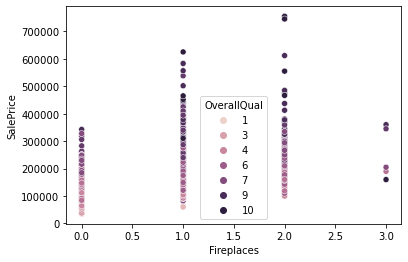

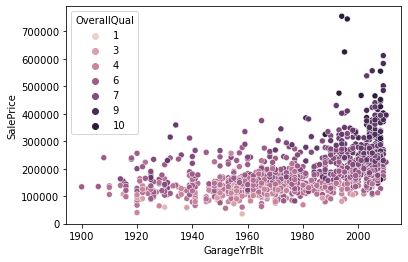

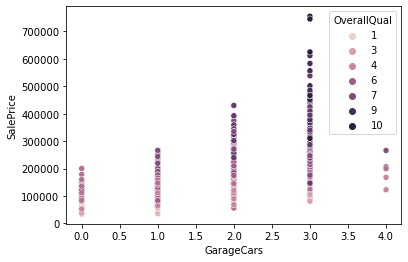

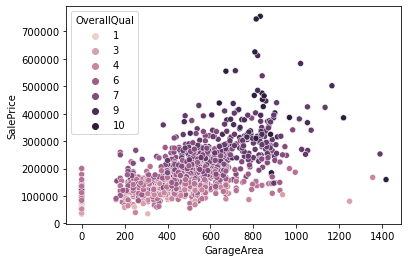

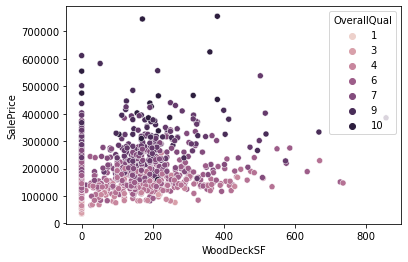

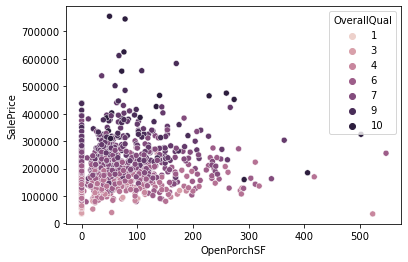

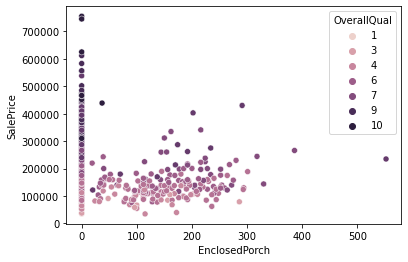

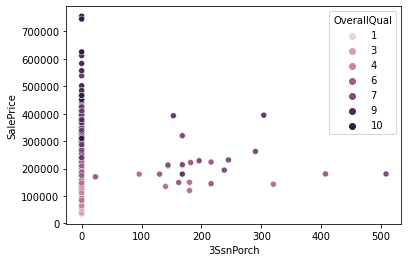

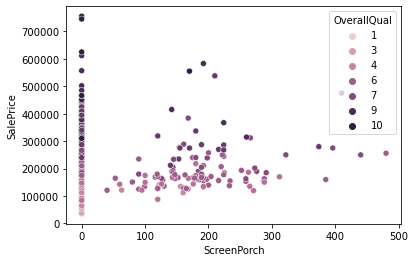

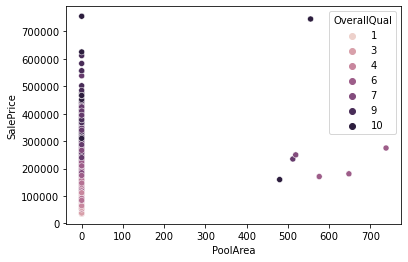

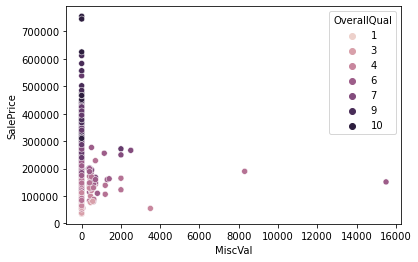

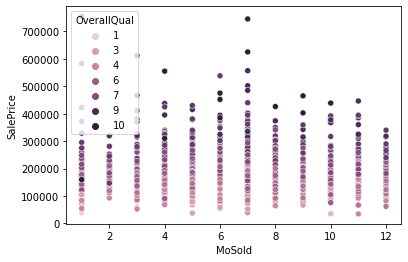

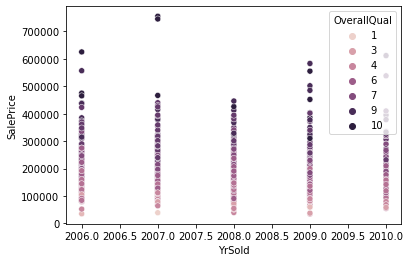

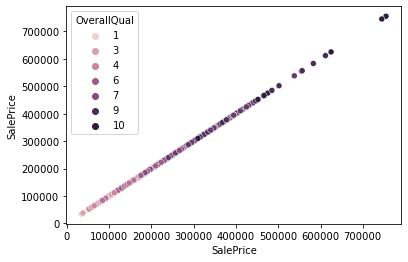

In [28]:
number_plot = len(list(df_num))
for col in df_num:
    sns.scatterplot(data=df_num, y='SalePrice', x=col, hue="OverallQual")
    plt.show()

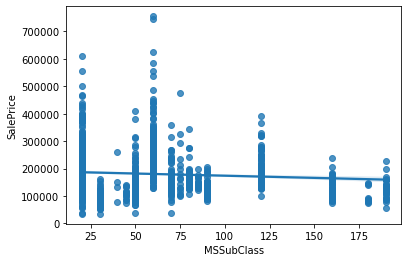

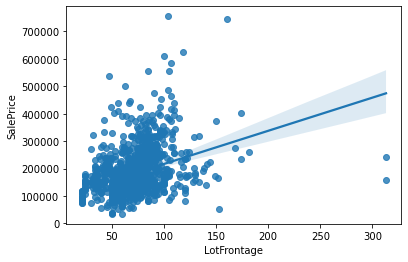

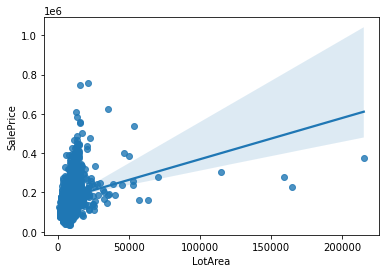

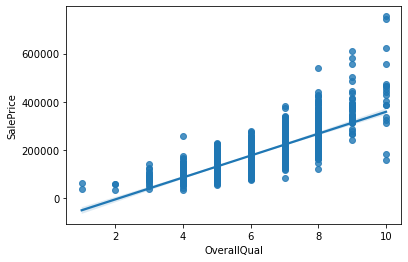

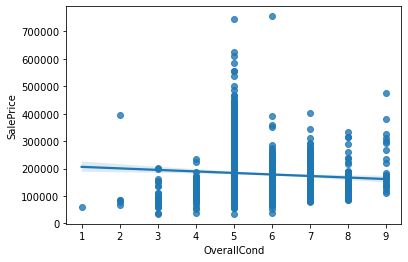

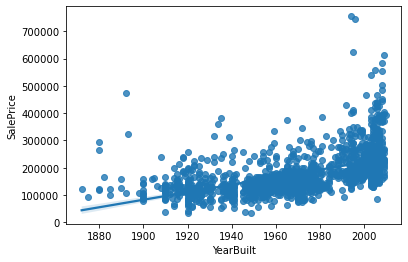

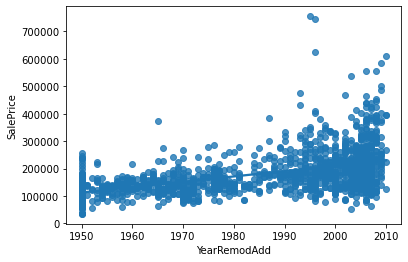

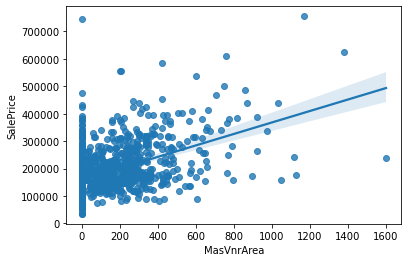

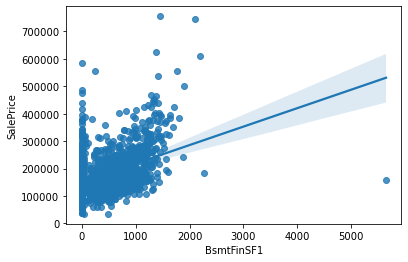

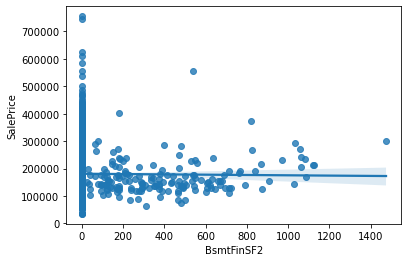

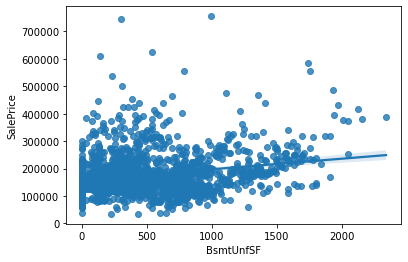

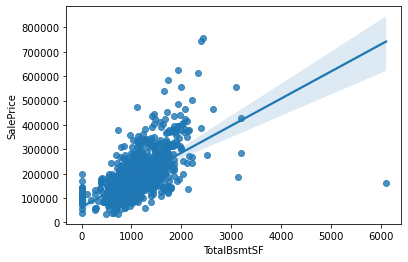

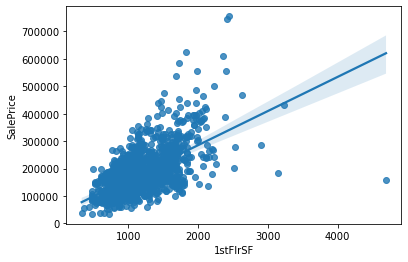

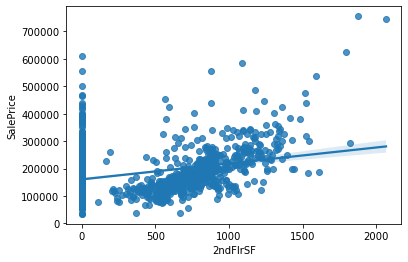

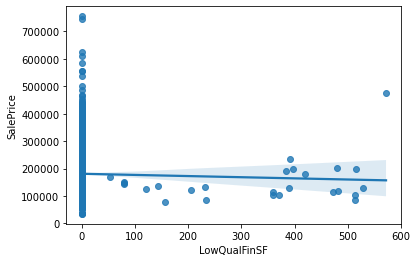

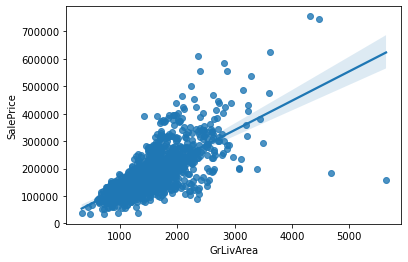

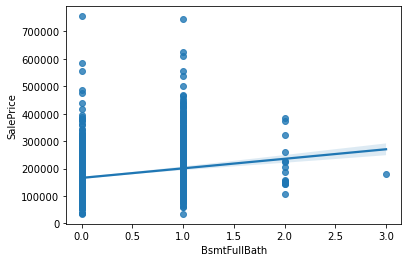

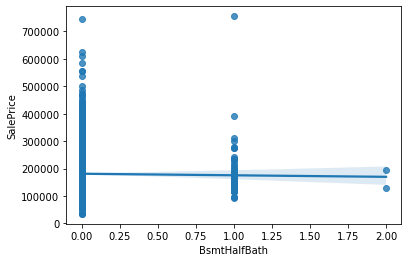

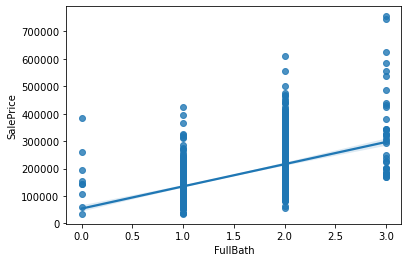

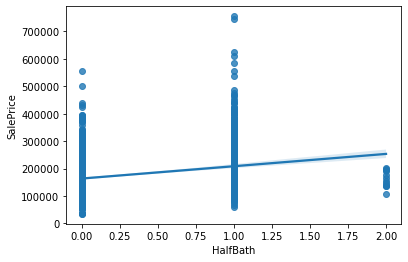

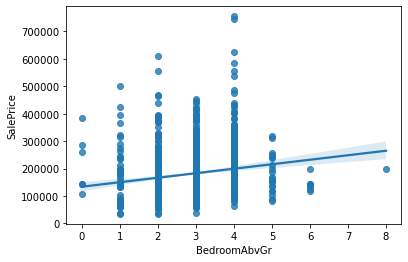

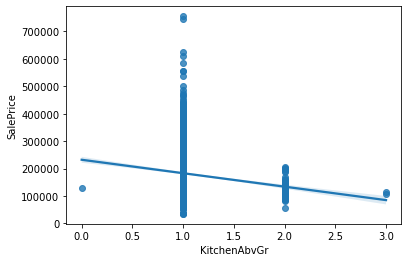

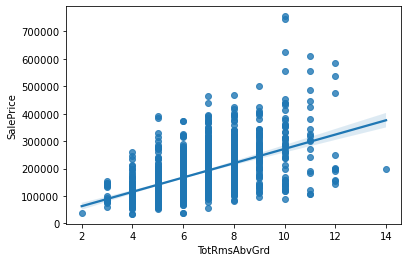

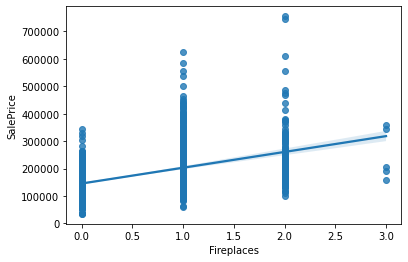

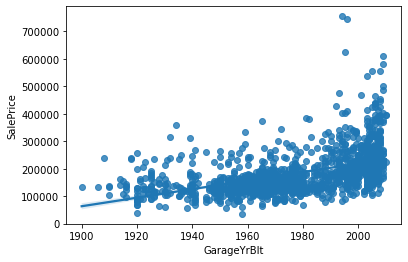

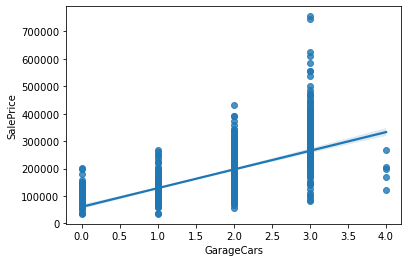

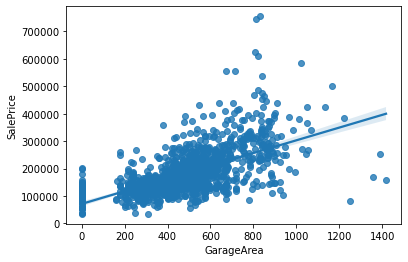

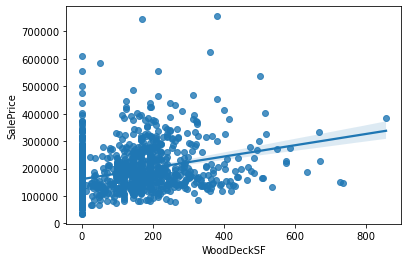

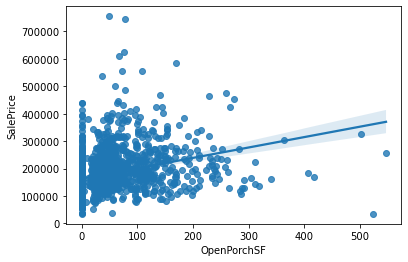

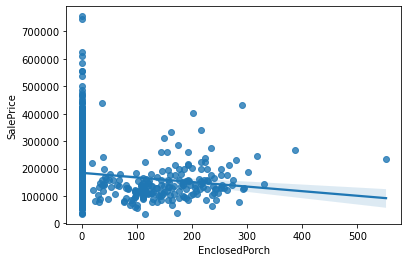

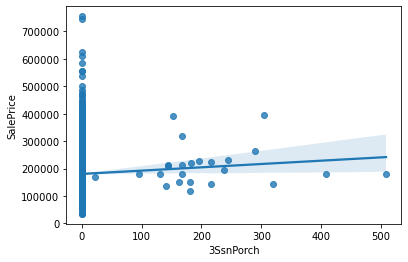

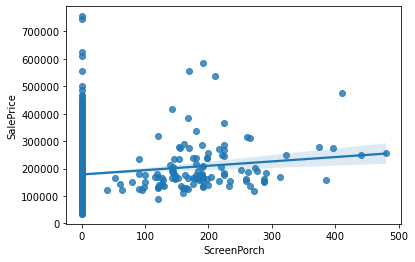

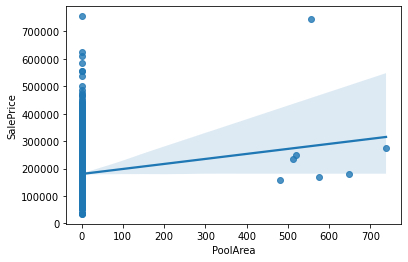

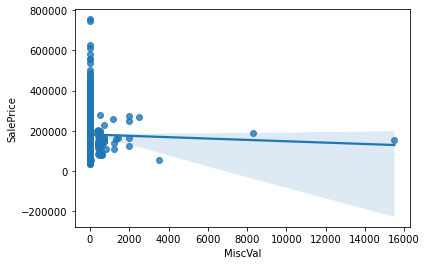

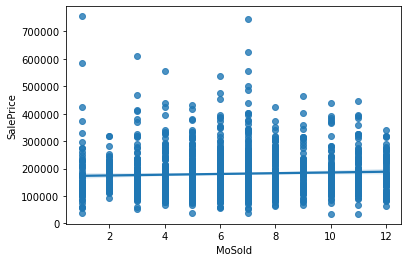

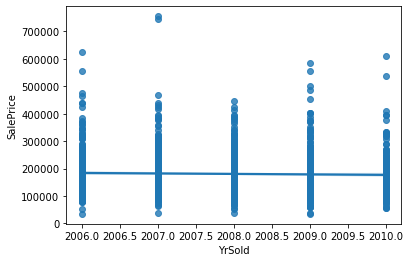

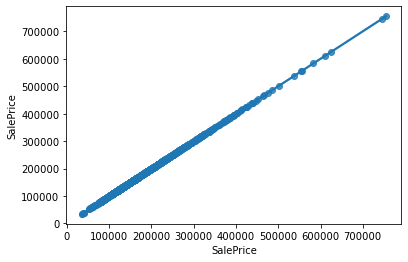

In [30]:
number_plot = len(list(df_num))
for col in df_num:
    sns.regplot(data=df_num, y='SalePrice', x=col)
    plt.show()

Check NaN and remove

In [42]:
df_num_len = len(df_num)
for col in df_num:
    count_nan = df_num[col].isna().sum()
    if (count_nan/df_num_len) > 0.1:
        print('Col: {}| Number: {}| Percent: {}'.format(col,count_nan, round(count_nan/df_num_len, 3)))
        

Col: LotFrontage| Number: 259| Percent: 0.177


In [43]:
df_cate_len = len(df_cate)
for col in df_cate:
    count_nan = df_cate[col].isna().sum()
    if (count_nan/df_cate_len) > 0.5:
        print('Col: {}| Number: {}| Percent: {}'.format(col,count_nan, round(count_nan/df_cate_len, 3)))

Col: Alley| Number: 1369| Percent: 0.938
Col: PoolQC| Number: 1453| Percent: 0.995
Col: Fence| Number: 1179| Percent: 0.808
Col: MiscFeature| Number: 1406| Percent: 0.963


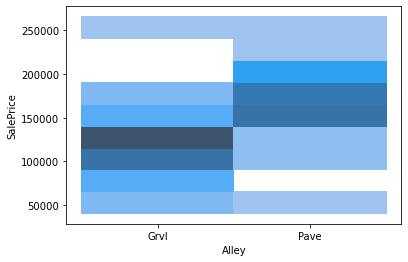

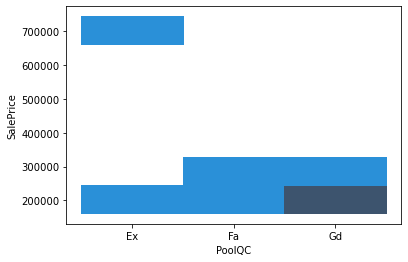

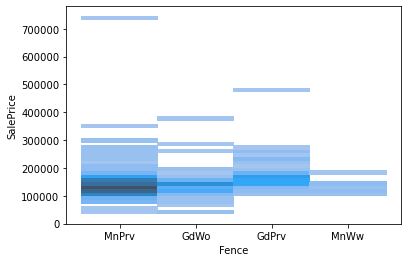

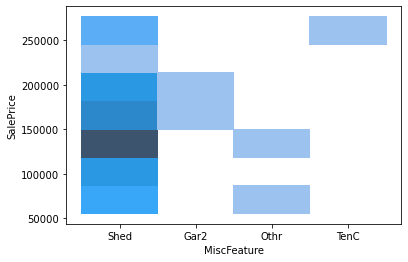

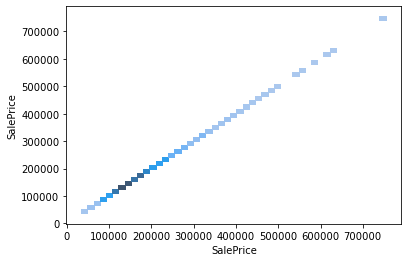

In [51]:
df_visual = df_cate[['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']]

number_plot = len(list(df_visual))
for col in df_visual:
    sns.histplot(data=df_visual, y='SalePrice', x=col)
    plt.show()

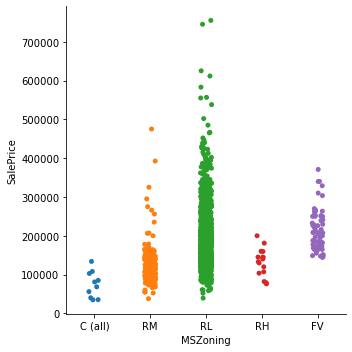

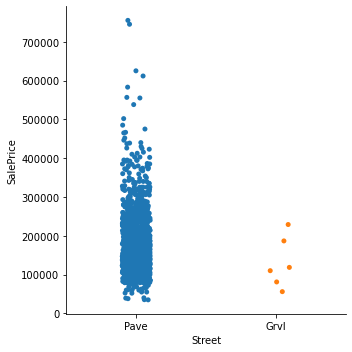

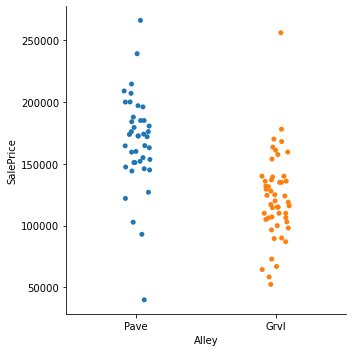

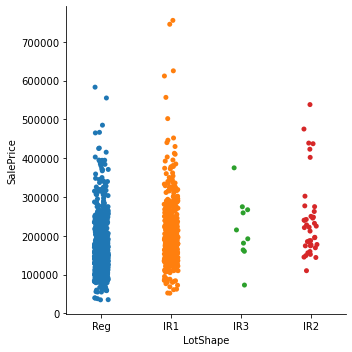

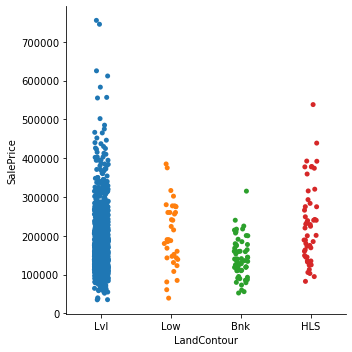

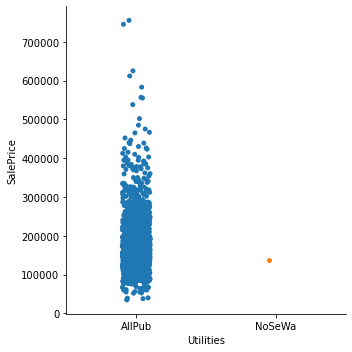

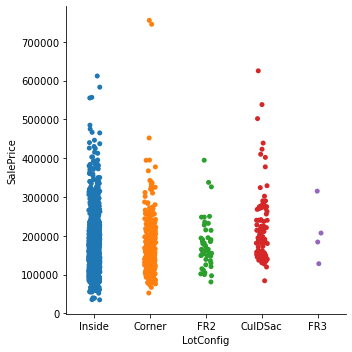

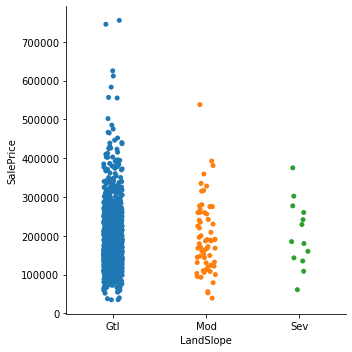

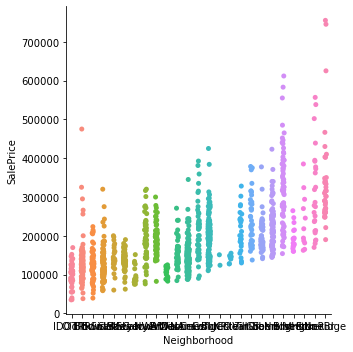

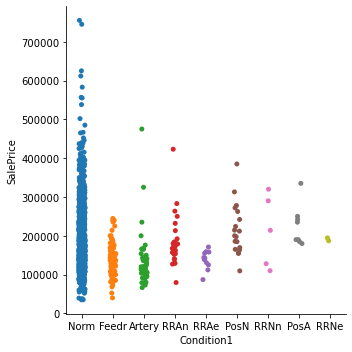

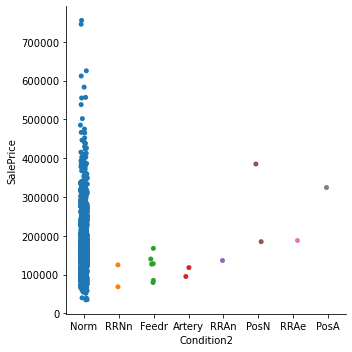

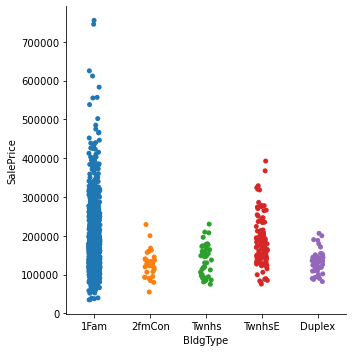

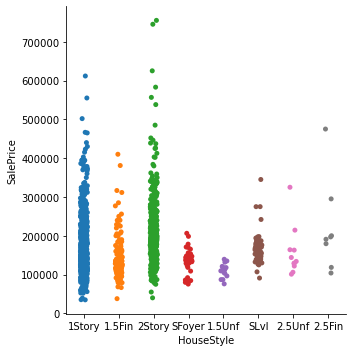

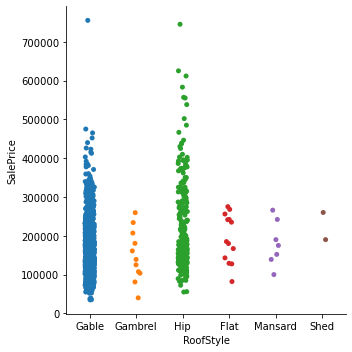

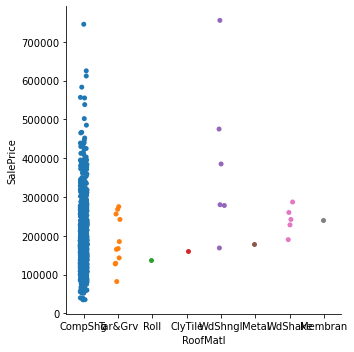

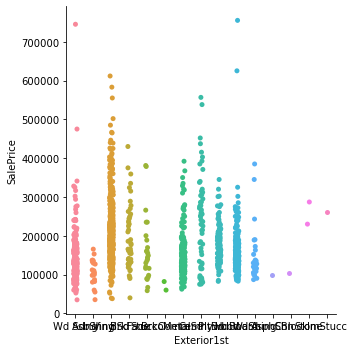

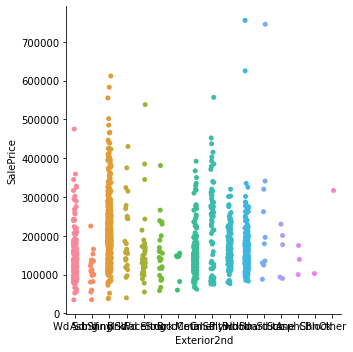

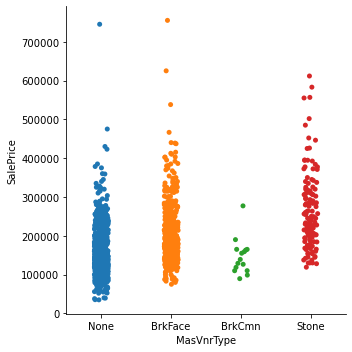

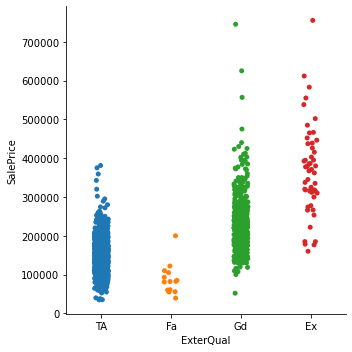

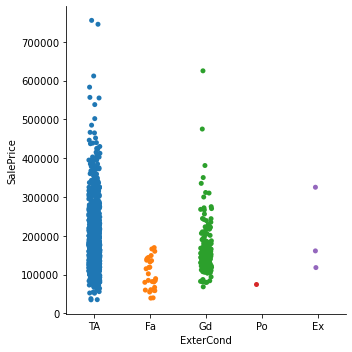

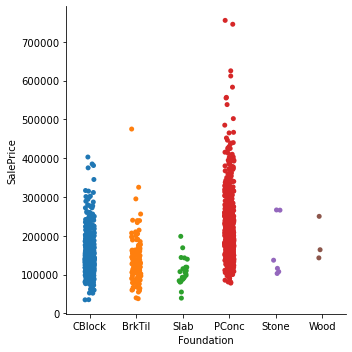

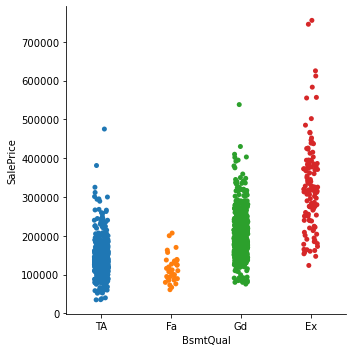

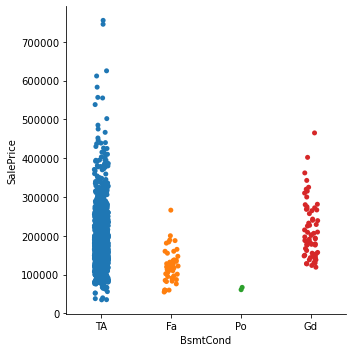

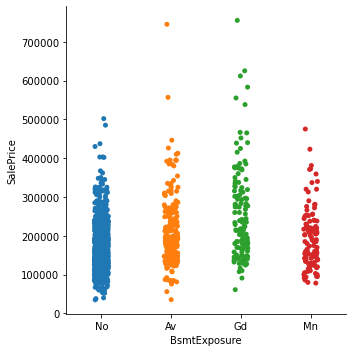

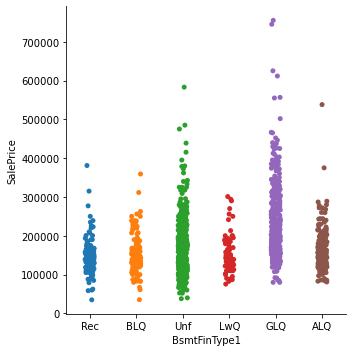

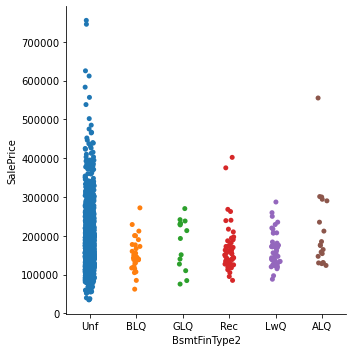

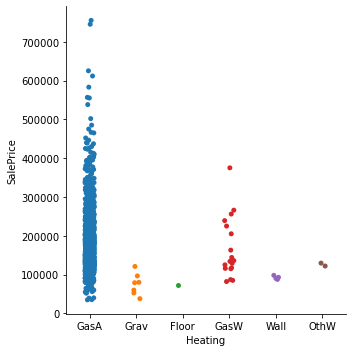

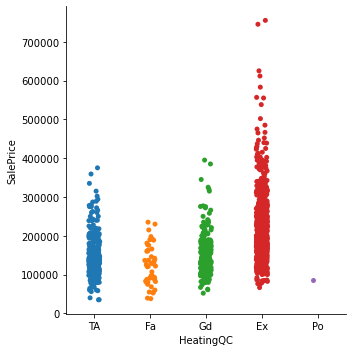

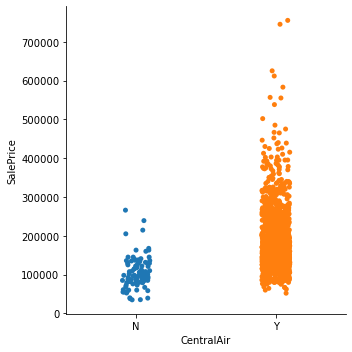

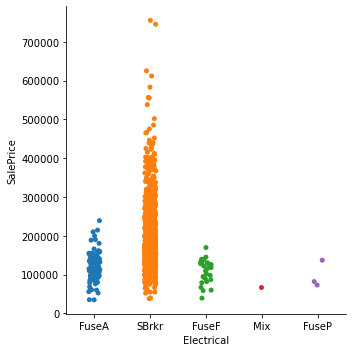

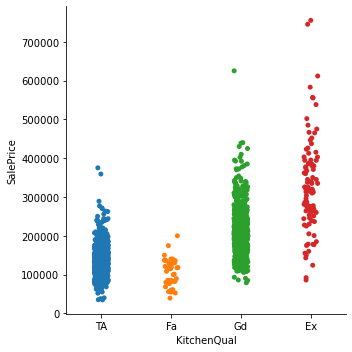

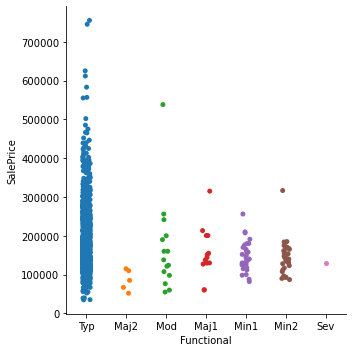

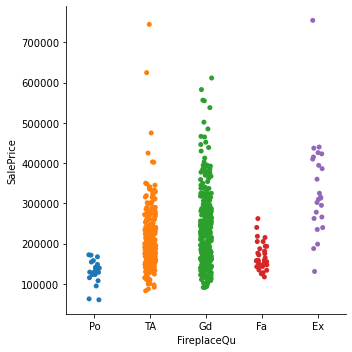

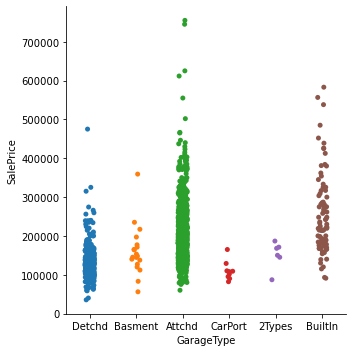

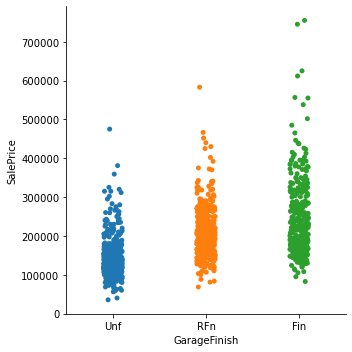

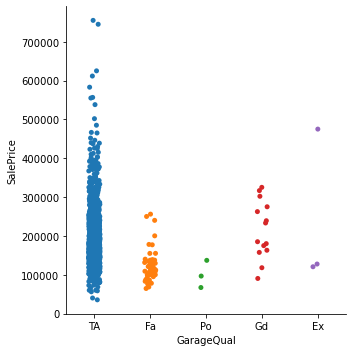

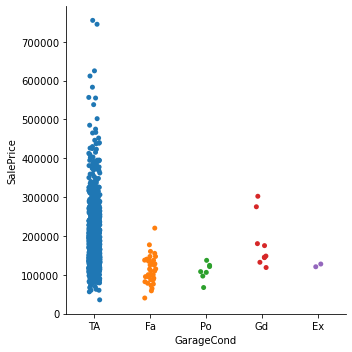

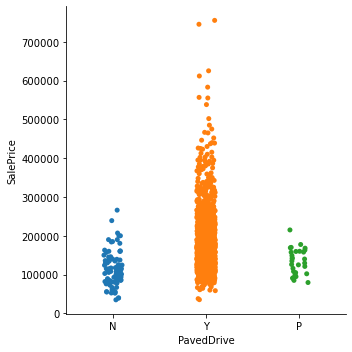

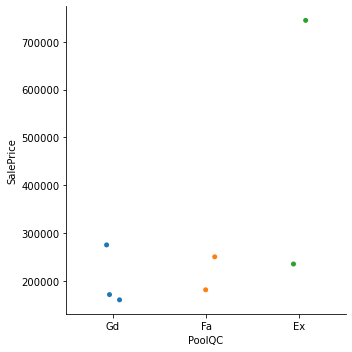

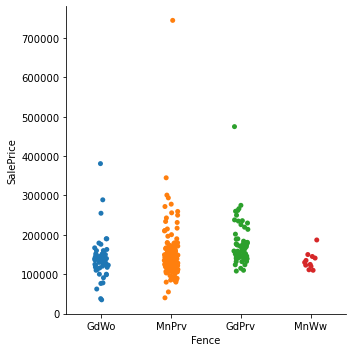

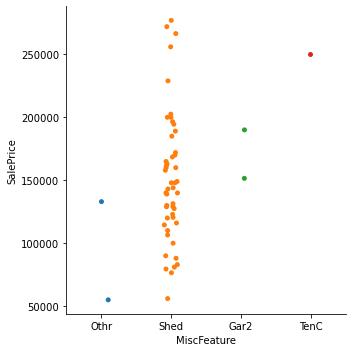

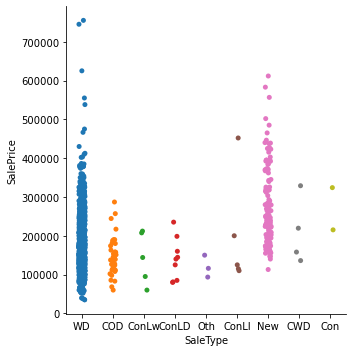

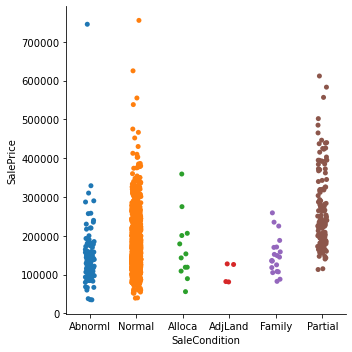

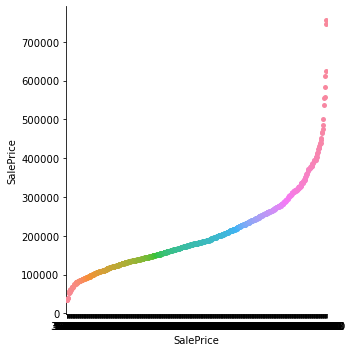

In [59]:
df_cate = df_cate.sort_values(by='SalePrice')
number_plot = len(list(df_cate))
for col in df_cate:
    sns.catplot(data=df_cate, y='SalePrice', x=col)
    plt.show()

In [60]:
for col in df_cate:
    count = df[col].nunique()
    if count > 10:
        print('Col: {}| Num cate: {}'.format(col, count))

Col: Neighborhood| Num cate: 25
Col: Exterior1st| Num cate: 15
Col: Exterior2nd| Num cate: 16
Col: SalePrice| Num cate: 663
